In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [0]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    cost = 0 
    for k in range(len(M)):
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:, k] * sq_distances).sum()
    return cost

def plot_k_means(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    exponents = np.empty((N, K))

    #initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        #step-1 determine assignments / responsibilities
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)

        #step-2 recalculate means 
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T

        c = cost(X, R, M)
        costs.append(c)

        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                print("cost increased!")
                print("M:", M)
                print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        plt.plot(costs)
        plt.title('Costs')
        plt.show()

        random_colors = np.random.random((K,3))
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors) 
        plt.show()

    print("Final cost", costs[-1])
    return M, R


def get_simple_data():
    #assume 3 means 
    D = 2 #so we can visualize more easily
    s = 4 #separation so we can control how far apart the means are
    mu1 = np.array([0,0])
    mu2 = np.array([s,s])
    mu3 = np.array([0,s])

    N = 900 #number of samples
    X = np.zeros((N,D))
    X[:300, :] = np.random.randn(300,D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300,D) + mu3
    return X

In [0]:
def main():
    X = get_simple_data()

    #what does it look like without clustering
    plt.scatter(X[:,0], X[:,1])
    plt.show()

    K=3
    plot_k_means(X, K, beta=1.0, show_plots=True)

    K = 3 
    plot_k_means(X, K, beta=3.0, show_plots=True)

    K = 3 
    plot_k_means(X, K, beta=10.0, show_plots=True)

    K = 5 #what happens if we choose a bad K
    plot_k_means(X, K, max_iter=30, show_plots=True)

    K = 5 #what happens when we change beta
    plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)

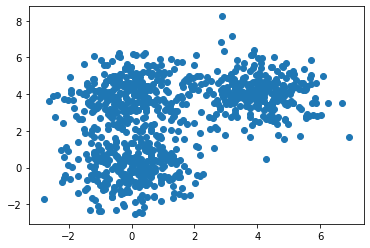

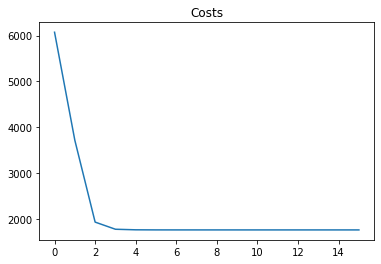

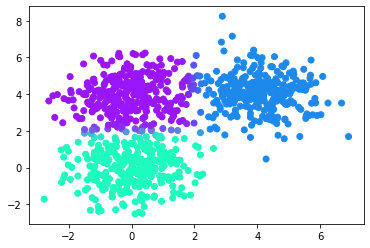

Final cost 1754.4305919764624


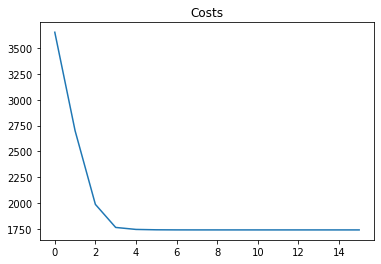

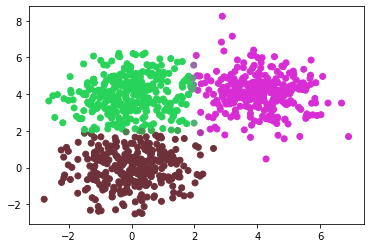

Final cost 1739.3067330401645


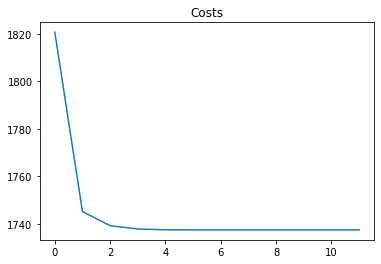

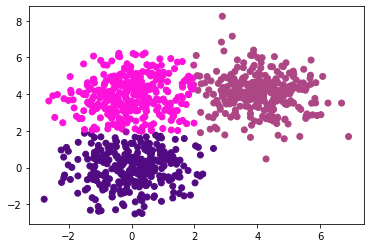

Final cost 1737.41268052726


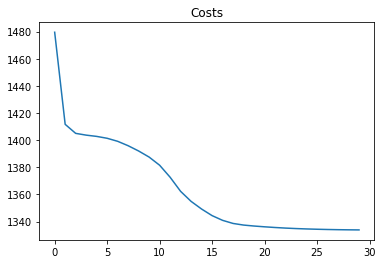

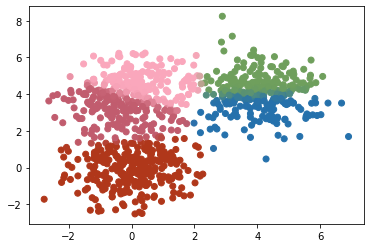

Final cost 1333.90052339496
cost increased!
M: [[ 3.83771184e+00  4.06607982e+00]
 [-3.08879359e-03 -1.45242606e-01]
 [-1.20429039e-01  4.08959673e+00]
 [ 1.72400205e-03  8.53379507e-01]
 [ 3.82959283e+00  4.06779377e+00]]
R.min: 1.396630836101009e-09 R.max: 0.9977724981449202
cost increased!
M: [[ 3.83678203e+00  4.06613801e+00]
 [-3.16359073e-03 -1.41469232e-01]
 [-1.20704799e-01  4.08856923e+00]
 [ 1.94558790e-03  8.43268283e-01]
 [ 3.82973667e+00  4.06762056e+00]]
R.min: 1.40090454954497e-09 R.max: 0.997795966130357
cost increased!
M: [[ 3.83594038e+00  4.06618214e+00]
 [-3.23235138e-03 -1.37737726e-01]
 [-1.20967896e-01  4.08758177e+00]
 [ 2.15345332e-03  8.33479718e-01]
 [ 3.82982371e+00  4.06746523e+00]]
R.min: 1.404778539516657e-09 R.max: 0.997817931690401
cost increased!
M: [[ 3.83517639e+00  4.06621442e+00]
 [-3.29536271e-03 -1.34051330e-01]
 [-1.21218871e-01  4.08663311e+00]
 [ 2.34830885e-03  8.24004872e-01]
 [ 3.82986353e+00  4.06732549e+00]]
R.min: 1.408301256931023e-09 R

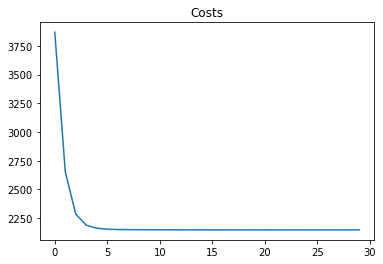

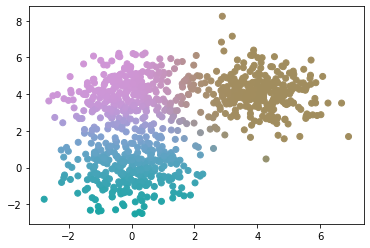

Final cost 2146.972776826024


In [18]:
if __name__ == '__main__':
    main()